In [3]:
pip install protobuf==3.20

   ---------------------------------------- 0.0/904.1 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/904.1 kB ? eta -:--:--
   ---------------------------------------- 904.1/904.1 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.10.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install --upgrade protobuf

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.3 which is incompatible.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.10.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import keras
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pip install tensorflow==2.4.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.4.0


In [ ]:
pip uninstall tensorflow

In [5]:
dataset_directory = "C:/Users/Apoorva/Downloads/archive (2)/"

In [6]:
#image size and batch to use in model
image_height = 128
image_width = 128
batch_size = 32

In [7]:
# Preparing Training, Validation and Test Datasets
train_dataset, val_test_dataset = keras.utils.image_dataset_from_directory(
    directory=dataset_directory,
    image_size=(image_height, image_width),
    color_mode='grayscale',
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.3,
    subset="both",
    seed=20,
    shuffle=True
)

Found 7023 files belonging to 4 classes.
Using 4917 files for training.
Using 2106 files for validation.


In [8]:
val_dataset = val_test_dataset.take(val_test_dataset.cardinality()//3)
test_dataset = val_test_dataset.skip(val_test_dataset.cardinality()//3)

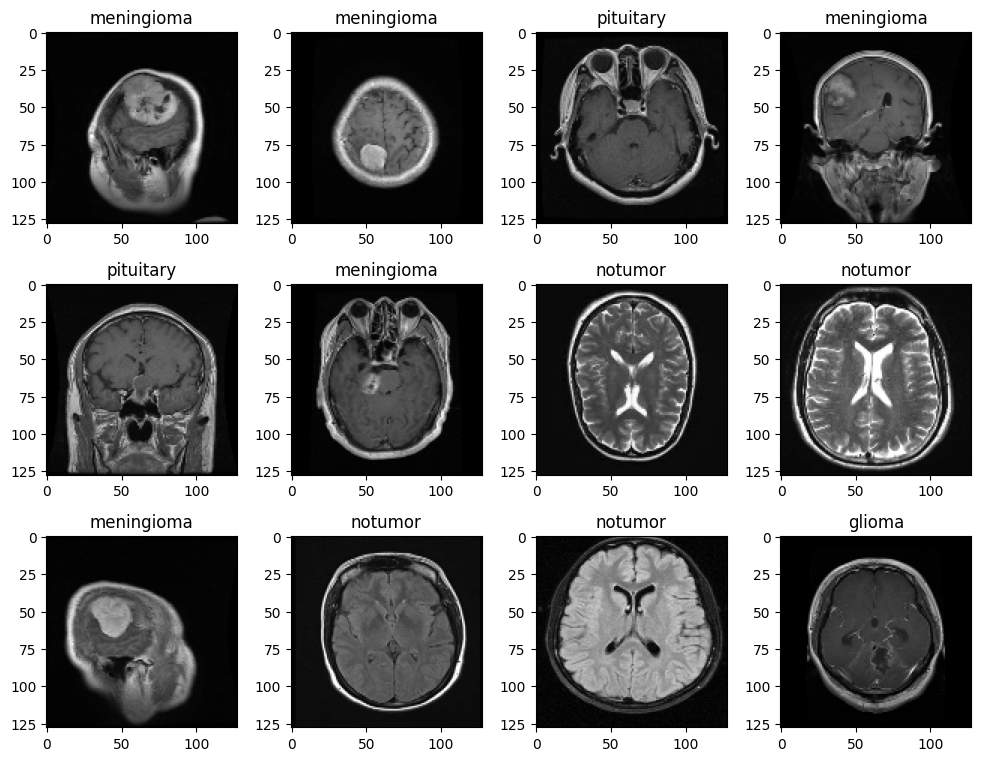

In [9]:
plt.figure(figsize=(10,10))

for images, labels in train_dataset.shuffle(buffer_size=100).take(1):
    for i in range(12):
        plt.subplot(4,4,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")), cmap="gray")
        plt.title(train_dataset.class_names[np.argmax(labels[i])])
        plt.tight_layout()


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset_cached = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset_cached = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset_cached = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
model = keras.models.Sequential([
    Input(shape=(image_height, image_width, 1), batch_size=batch_size),
    Rescaling(scale=1./255),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=4, activation='softmax')    
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 128, 128, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 126, 126, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (32, 63, 63, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 61, 61, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 30, 30, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 28, 28, 32)          9

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=.001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [12]:
history = model.fit(train_dataset_cached,epochs=50,batch_size= batch_size, validation_data=val_dataset_cached)
model_saving_path = '/kaggle/working/brain_tumor_classification.h5'
model.save(model_saving_path, overwrite=True)

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - accuracy: 0.5527 - loss: 1.0101 - val_accuracy: 0.8054 - val_loss: 0.4666
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.7934 - loss: 0.5286 - val_accuracy: 0.8438 - val_loss: 0.3962
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.8496 - loss: 0.4003 - val_accuracy: 0.8693 - val_loss: 0.3314
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.8768 - loss: 0.3153 - val_accuracy: 0.9091 - val_loss: 0.2756
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.9108 - loss: 0.2398 - val_accuracy: 0.9077 - val_loss: 0.2643
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.9362 - loss: 0.1818 - val_accuracy: 0.9290 - val_loss: 0.2171
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.9432 - loss: 0.1550 - val_accuracy: 0.9276 - val_loss: 0.2279
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0.9479 - loss: 0

# ACCUARACY CURVE

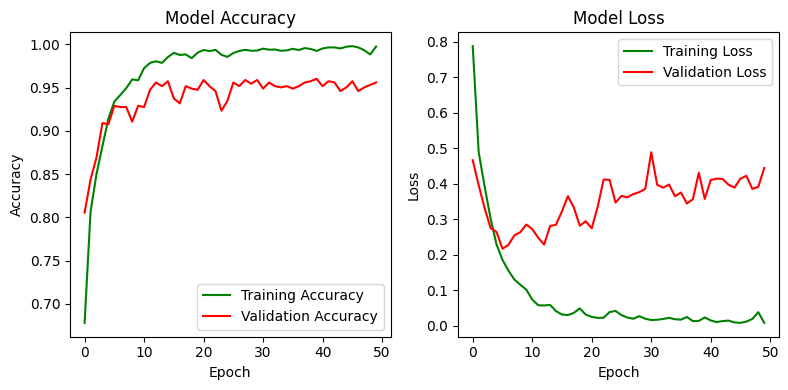

In [13]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy", color='green')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss", color="green")
plt.plot(history.history['val_loss'], label="Validation Loss", color="red")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
model.evaluate(test_dataset_cached, batch_size=batch_size)

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9671 - loss: 0.1844


[0.23076225817203522, 0.9629101157188416]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


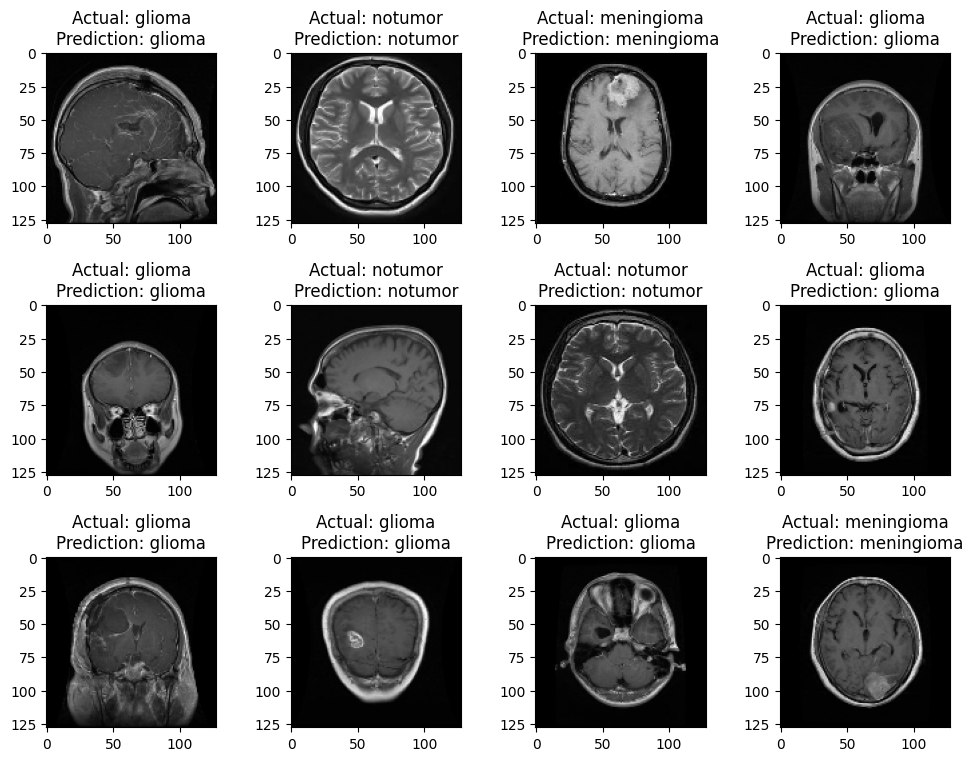

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.shuffle(buffer_size=100).take(1):
    for i in range(12):
        actual_label = train_dataset.class_names[np.argmax(labels[i])]
        img2predict = np.squeeze(images[i].numpy().astype("uint8"))
                
        plt.subplot(4, 4, i + 1)
        plt.imshow(img2predict, cmap="gray")

        img2predict = np.expand_dims(img2predict, axis=0)
        
        predictions = model.predict(img2predict)
        prediction = np.argmax(predictions[0])
        
        if prediction == 0:
            predicted_label = 'glioma'
        elif prediction == 1:
            predicted_label = 'meningioma'
        elif prediction == 2:
            predicted_label = 'notumor'
        else:
            predicted_label ='pituitary'

        
        plt.title(f"Actual: {actual_label}\nPrediction: {predicted_label}")
        plt.tight_layout()